## Visualização e exploração dos dados do Covid-19 em Portugal

#### Dados extraídos de : 
- https://github.com/dssg-pt/covid19pt-data 
- https://www.dgs.pt/
- https://github.com/CSSEGISandData/COVID-19

## Obrigado pela vossa compilação, assim podemos acompanhar a evolução


In [1]:
#importacao de bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
import pandas as pd
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
import numpy as np

In [2]:
PATH_DATA = "../"

In [3]:
#chamar o ficheiro do tipo csv
df_data = pd.read_csv(f"{PATH_DATA}data.csv")

In [4]:
df_data.tail()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,confirmados_80_plus_f,confirmados_80_plus_m,sintomas_tosse,sintomas_febre,sintomas_dificuldade_respiratoria,sintomas_cefaleia,sintomas_dores_musculares,sintomas_fraqueza_generalizada,confirmados_f,confirmados_m
21,18-03-2020,18-03-2020 00:00,642,289,74,243,2,21,3,1,...,11.0,19.0,0.31,0.24,0.10,0.17,0.17,0.12,NaN,NaN
22,19-03-2020,19-03-2020 00:00,785,381,86,278,2,25,3,1,...,21.0,17.0,0.25,0.20,0.08,0.14,0.14,0.10,390.0,395.0
23,20-03-2020,20-03-2020 00:00,1020,506,106,361,2,29,3,1,...,27.0,25.0,0.20,0.15,0.06,0.11,0.11,0.08,506.0,514.0
24,21-03-2020,21-03-2020 00:00,1280,644,137,448,3,31,3,5,...,38.0,35.0,0.10,0.22,0.09,0.14,0.17,0.11,649.0,631.0
25,22-03-2020,22-03-2020 00:00,1600,825,180,534,5,35,4,7,...,51.0,44.0,0.44,0.36,0.14,0.20,0.24,0.16,821.0,779.0


In [5]:
# Informação sobre os campos do ficheiro csv
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 48 columns):
data                                 26 non-null object
data_dados                           26 non-null object
confirmados                          26 non-null int64
confirmados_arsnorte                 26 non-null int64
confirmados_arscentro                26 non-null int64
confirmados_arslvt                   26 non-null int64
confirmados_arsalentejo              26 non-null int64
confirmados_arsalgarve               26 non-null int64
confirmados_acores                   26 non-null int64
confirmados_madeira                  26 non-null int64
confirmados_estrangeiro              11 non-null float64
confirmados_novos                    26 non-null int64
recuperados                          26 non-null int64
obitos                               26 non-null int64
internados                           18 non-null float64
internados_uci                       9 non-null float64
lab       

In [6]:
#estatistica descritiva dos dados
df_data.describe()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,...,confirmados_80_plus_f,confirmados_80_plus_m,sintomas_tosse,sintomas_febre,sintomas_dificuldade_respiratoria,sintomas_cefaleia,sintomas_dores_musculares,sintomas_fraqueza_generalizada,confirmados_f,confirmados_m
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,11.000000,26.000000,...,20.000000,20.000000,20.000000,20.000000,18.000000,20.000000,20.000000,20.000000,4.00000,4.000000
mean,266.692308,130.884615,27.153846,96.192308,0.538462,7.846154,0.730769,0.576923,6.181818,61.538462,...,8.600000,7.950000,0.518000,0.462500,0.112222,0.297500,0.351000,0.236000,591.50000,579.750000
std,440.170582,220.634599,48.954422,153.165536,1.240347,11.109248,1.282426,1.653435,3.280798,93.180784,...,14.644561,13.044358,0.190445,0.218026,0.028811,0.131544,0.160391,0.120978,186.09048,164.096262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.100000,0.150000,0.060000,0.110000,0.110000,0.080000,390.00000,395.000000
25%,4.500000,2.250000,1.000000,1.250000,0.000000,0.000000,0.000000,0.000000,4.500000,2.000000,...,0.000000,0.000000,0.412500,0.300000,0.092500,0.185000,0.180000,0.130000,477.00000,484.250000
50%,40.000000,27.000000,1.500000,9.500000,0.000000,2.000000,0.000000,0.000000,6.000000,9.000000,...,0.000000,2.000000,0.535000,0.465000,0.100000,0.290000,0.385000,0.225000,577.50000,572.500000
75%,309.500000,129.250000,25.750000,135.500000,0.000000,12.250000,1.000000,0.000000,9.000000,83.500000,...,11.250000,8.000000,0.662500,0.570000,0.137500,0.422500,0.492500,0.315000,692.00000,668.000000
max,1600.000000,825.000000,180.000000,534.000000,5.000000,35.000000,4.000000,7.000000,10.000000,320.000000,...,51.000000,44.000000,0.770000,0.890000,0.170000,0.500000,0.570000,0.470000,821.00000,779.000000


In [7]:
data1 = pd.read_csv(f"{PATH_DATA}data.csv", parse_dates=[0], index_col=[0], infer_datetime_format=True)
data1.fillna(value=0).head(5)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,confirmados_80_plus_f,confirmados_80_plus_m,sintomas_tosse,sintomas_febre,sintomas_dificuldade_respiratoria,sintomas_cefaleia,sintomas_dores_musculares,sintomas_fraqueza_generalizada,confirmados_f,confirmados_m
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


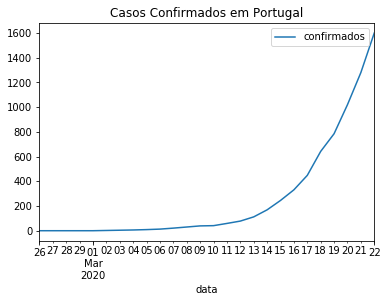

In [8]:
#Evolução do número de casos
data1[['confirmados']].plot(kind='line', title='Casos Confirmados em Portugal')

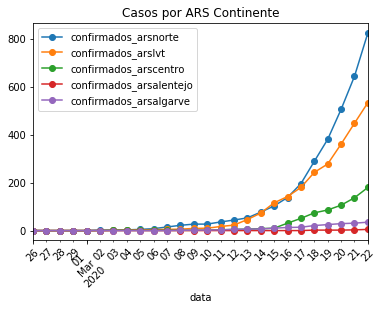

In [9]:
#Evolução do número de casos por ARS
data1[['confirmados_arsnorte', 'confirmados_arslvt', 'confirmados_arscentro', 'confirmados_arsalentejo', 'confirmados_arsalgarve',]].plot(kind='line', title='Casos por ARS Continente', linestyle='-', marker='o', rot=45, fontsize=10)

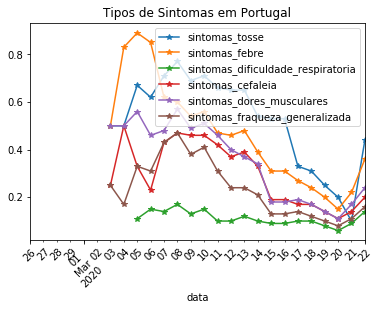

In [10]:
#Tipos de sintomas
data1[['sintomas_tosse' , 'sintomas_febre' , 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia' , 'sintomas_dores_musculares' , 'sintomas_fraqueza_generalizada']].plot(kind='line', title='Tipos de Sintomas em Portugal', linestyle='-', marker='*', rot=45, fontsize=10)

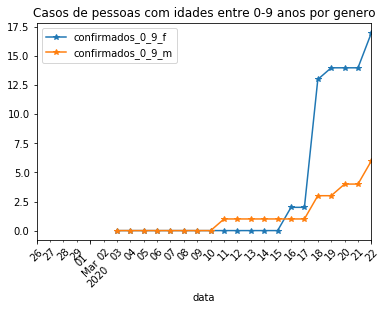

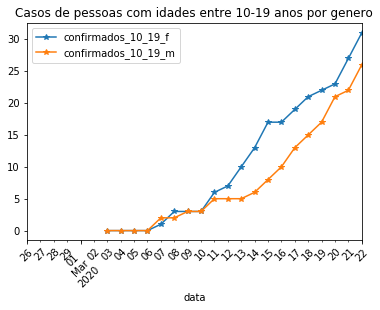

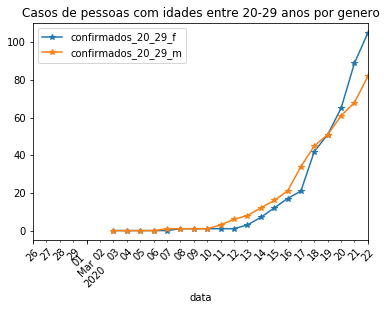

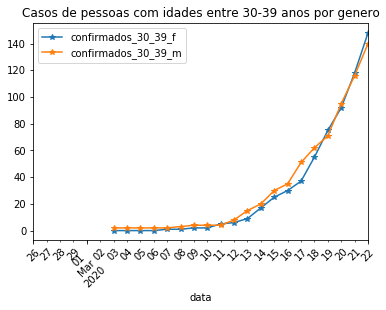

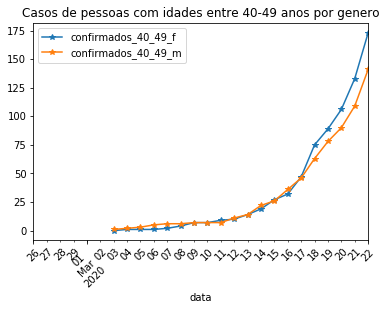

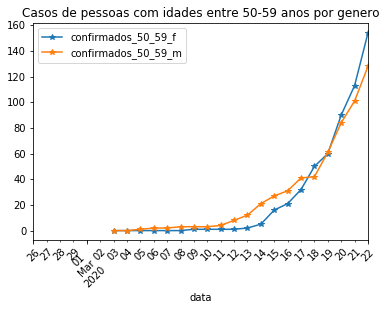

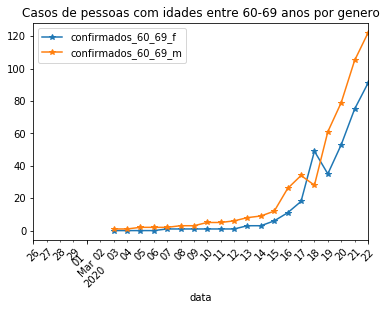

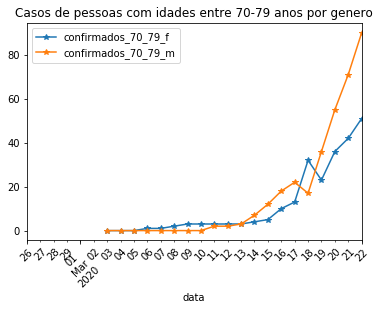

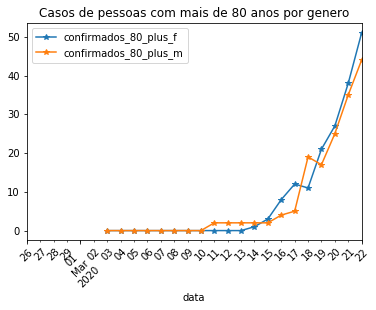

In [11]:
data1[['confirmados_0_9_f' , 'confirmados_0_9_m']].plot(kind='line', title='Casos de pessoas com idades entre 0-9 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_10_19_f' , 'confirmados_10_19_m']].plot(kind='line', title='Casos de pessoas com idades entre 10-19 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_20_29_f' , 'confirmados_20_29_m']].plot(kind='line', title='Casos de pessoas com idades entre 20-29 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_30_39_f' , 'confirmados_30_39_m']].plot(kind='line', title='Casos de pessoas com idades entre 30-39 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_40_49_f' , 'confirmados_40_49_m']].plot(kind='line', title='Casos de pessoas com idades entre 40-49 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_50_59_f' , 'confirmados_50_59_m']].plot(kind='line', title='Casos de pessoas com idades entre 50-59 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_60_69_f' , 'confirmados_60_69_m']].plot(kind='line', title='Casos de pessoas com idades entre 60-69 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_70_79_f' , 'confirmados_70_79_m']].plot(kind='line', title='Casos de pessoas com idades entre 70-79 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_80_plus_f' , 'confirmados_80_plus_m']].plot(kind='line', title='Casos de pessoas com mais de 80 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)


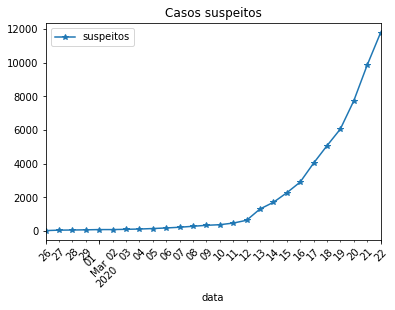

In [12]:
#Evolução dos suspeitos
data1[['suspeitos' ]].plot(kind='line', title='Casos suspeitos', linestyle='-', marker='*', rot=45, fontsize=10)

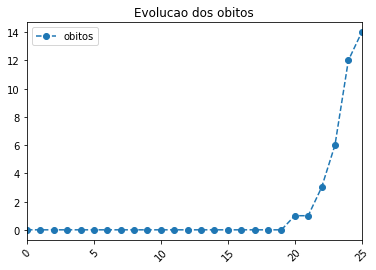

In [13]:
#obitos

df_data[['obitos']].plot(kind='line', title='Evolucao dos obitos', linestyle='--', marker='o', rot=45, fontsize=10)

## Ordinary Least Squares (OLS) -> Estimacao de parametros desconhecidos da regressão linear

In [14]:
confir = np.array([2, 4, 6, 9, 13, 21, 30, 39, 41, 59, 78, 112, 169, 245, 331, 448, 642, 785, 1020, 1280, 1600])

In [15]:
print (confir)

[   2    4    6    9   13   21   30   39   41   59   78  112  169  245
  331  448  642  785 1020 1280 1600]


In [16]:
x = np.arange(len(confir))
x = add_constant(x)

In [17]:
modelo = OLS(np.log(confir[:20]), x[:20])

In [18]:
resultado = modelo.fit()

In [19]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2437.
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           1.14e-20
Time:                        15:55:02   Log-Likelihood:                 8.0315
No. Observations:                  20   AIC:                            -12.06
Df Residuals:                      18   BIC:                            -10.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1634      0.074     15.815      0.000       1.009       1.318
x1             0.3268      0.007     49.368      0.000       0.313       0.341
==============================================================================
Omnibus:                        6.828   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.396
Skew:                          -0.819   Prob(JB):                        0.111
Kurtosis:                       4.609   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

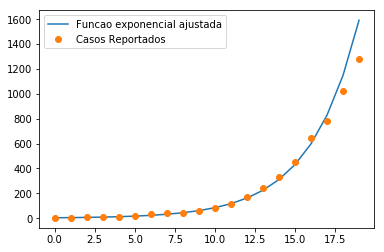

In [20]:
plt.plot(
    np.exp(resultado.predict(x[:20])),
    label="Funcao exponencial ajustada"      
)
plt.plot(confir[:20], "o", label="Casos Reportados")
plt.legend()
plt.show()